fastai has just released [nbdev2](https://nbdev.fast.ai/).

This is a complete rewrite with quarto. I like how they displayed features in that card

![](https://nbdev.fast.ai/images/card.png)

# Support

There is a [nbdev section](https://forums.fast.ai/c/nbdev/48) in fastai forum.

There is a channel [#nbdev-help](https://discord.com/channels/689892369998676007/887694559952400424) at fastai discord.

And [issues page](https://github.com/fastai/nbdev/issues) in github fastai/nbdev repo.

# Walkthrough

There is a 90 min video: [nbdev tutorial](https://www.youtube.com/watch?v=l7zS8Ld4_iA&ab_channel=JeremyHoward) -- zero to published project in 90 minutes

I follow here this tutorial.

Here are the big steps:

## create github project

- create a new project with github: [dataset_tools](https://github.com/castorfou/dataset_tools). Give a description it will be reused by nbdev

## integrate `nbdev` in your python environment

- create a local conda env `dataset_tools` with what is required to develop this library

In [12]:
!cat /home/guillaume/_conda_env/dataset_tools.txt

conda remove --name dataset_tools --all
conda create --name dataset_tools python=3.9
conda activate dataset_tools
conda install ipykernel
python -m ipykernel install --user --name=dataset_tools
pip install nbdev -U
pip install pandas


In [11]:
import sys
!{sys.prefix}/bin/pip list|grep nbdev

nbdev              2.2.10


## clone repo and turned it into a nbdev repo

- clone repo `dataset_tools` and turn it into a nbdev repo


```bash
git clone git@github.com:castorfou/dataset_tools.git
conda activate dataset_tools
cd dataset_tools
```

## nbdev_ commands are ready to be used

* nbdev can be used from here. For example `nbdev_help`  to display all nbdev_ commands and what it does. And more detail can be got with `-h`: `nbdev_new -h`

In [14]:
!{sys.prefix}/bin/nbdev_help

nbdev_bump_version              Increment version in settings.ini by one
nbdev_changelog                 Create a CHANGELOG.md file from closed and labeled GitHub issues
nbdev_clean                     Clean all notebooks in `fname` to avoid merge conflicts
nbdev_conda                     Create a `meta.yaml` file ready to be built into a package, and optionally build and upload it
nbdev_create_config             Create a config file.
nbdev_deploy                    Deploy docs to GitHub Pages
nbdev_docs                      Create Quarto docs and README.md
nbdev_export                    Export notebooks in `path` to Python modules
nbdev_filter                    A notebook filter for Quarto
nbdev_fix                       Create working notebook from conflicted notebook `nbname`
nbdev_help                      Show help for all console scripts
nbdev_install                   Install Quarto and the current library
nbdev_install_hooks             Install Jupyter and git hooks to automa

* `nbdev_new`. It is creating the structure and files such as settings.ini.
* from base environment we can start `jupyter notebook`. It is advised to install nb_extensions (`pip install jupyter_contrib_nbextensions`), and activate TOC2. Open `00_core.ipynb` with `dataset_tools` kernel. Rename `00_core.ipynb` --> `00_container.ipynb`

## and `#| ` prefix in notebooks as well

Jeremy explains then what are `#|` used by quarto and nbdev.

And for example `#| hide` will allow to be executed but hide in your documentation.

Actually from a single notebook, you have 3 usages:
* the notebook by itself -  all cells are executed, whatever are the prefix `#|` that you display on cells
* the python file -  only the cells with `#| export` will be published in a python file referenced as `#| default_exp <name of python file>`. A new file is genreated when `nbdev_export` is called.
* the documentation - all cells are used, except the one started with `#| hide`. Seems to be dynamically generated (when `nbdev_preview` is running?). `#| export` are handled specifically: if you have import, nothing is displayed. If you have code, definitions and docstrings are exported, and arguments as well.

There is an easy way to describe arguments of a function.

Just make some indentation with comments such as in

```python
    def __init__(self, 
                 cle : str, # la clé du container
                 dataset : pd.DataFrame = None, # le dataset
                 colonnes_a_masquer : list = [], # les colonnes à masquer
                 colonnes_a_conserver : list = [] # les colonnes qui ne seront pas transformées
                ):
```

### show_doc

and we can directly see the effect of it by calling `show_doc` (`show_doc(Container)`). You can even call show_doc on code not written with nbdev, or not even written by you.

In [17]:
from nbdev.showdoc import *
import pandas as pd
show_doc(pd.DataFrame)

/home/guillaume/miniconda/envs/dataset_tools/lib/python3.9/site-packages/fastcore/docscrape.py:225: UserWarning: Unknown section See Also
  else: warn(msg)
/home/guillaume/miniconda/envs/dataset_tools/lib/python3.9/site-packages/fastcore/docscrape.py:225: UserWarning: Unknown section Examples
  else: warn(msg)


---

### DataFrame

>      DataFrame (data=None, index:Axes|None=None, columns:Axes|None=None,
>                 dtype:Dtype|None=None, copy:bool|None=None)

Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| data | NoneType | None | Dict can contain Series, arrays, constants, dataclass or list-like objects. If<br>data is a dict, column order follows insertion-order. If a dict contains Series<br>which have an index defined, it is aligned by its index.<br><br>.. versionchanged:: 0.25.0<br>   If data is a list of dicts, column order follows insertion-order. |
| index | Axes \| None | None | Index to use for resulting frame. Will default to RangeIndex if<br>no indexing information part of input data and no index provided. |
| columns | Axes \| None | None | Column labels to use for resulting frame when data does not have them,<br>defaulting to RangeIndex(0, 1, 2, ..., n). If data contains column labels,<br>will perform column selection instead. |
| dtype | Dtype \| None | None | Data type to force. Only a single dtype is allowed. If None, infer. |
| copy | bool \| None | None | Copy data from inputs.<br>For dict data, the default of None behaves like ``copy=True``.  For DataFrame<br>or 2d ndarray input, the default of None behaves like ``copy=False``.<br><br>.. versionchanged:: 1.3.0 |

### unit testing

There are some basic testing functionalty available by importing fastcore. `from fastcore.test import *`

With `test_eq` very closed to `assert` and `test_ne` closed to `assert not`

In [20]:
from fastcore.test import *
show_doc(test_eq)
show_doc(test_ne)

---

[source](https://github.com/fastai/fastcore/blob/master/fastcore/test.py#LNone){target="_blank" style="float:right; font-size:smaller"}

### test_ne

>      test_ne (a, b)

`test` that `a!=b`

This is convenient to integrate all the unit tests that way. When you will export by running `Restart & Run All`, if an error is met, export won't be done.

And one can run `nbdev_test` from the command line.

### @patch - define method out of its class

Just by adding this import

```python
from fastcore.utils import *
```

one can use
```python
@patch
def new_method(self:myclass):
    pass
```


### `nbdev_export`

from command line, one can run `nbdev_export`

or directly from jupyter, for example will be executing `Restart & Run All`

```python
#| hide
import nbdev; nbdev.nbdev_export()
```



And we can install it to be used directly by running `pip install -e .`

It means that you can now import your project with

`from dataset_tools.container import *`

When it will be published (pypi or conda), it will be installable by calling

`pip install dataset-tools`

or

`conda install -c fastai dataset-tools`

NB: see how `_` has been turned into `-`, and for that to happen we have to update `lib_name` and `lib_path` in `settings.ini` by replacing `_`with `-`

NB2: it is still confusing for me. It looks like modifying `lib_path` is not a good optiom.

### index.ipynb

Here it is a good idea to give overview about how to use it.

By importing your library and start using it.

And it will be exported as the homepage of your lib.

Just have to decide what should land in index and what should land in module page.

### `nbdev_preview`

Just run it from command line

```bash
nbdev_preview
```

and it is accessible from http://localhost:3000.

This is a quarto webserver. The 1st time you launch it it will install quarto for you. On ubuntu this is a standard package so it will be updated regularly.


In [22]:
from getpass import getpass
!echo {getpass()} | sudo -S apt-cache show quarto

········
[sudo] password for guillaume: Package: quarto
Status: install ok installed
Priority: optional
Section: user/text
Installed-Size: 242759
Maintainer: RStudio, PBC <quarto@rstudio.org>
Architecture: amd64
Version: 1.1.189
Description: Quarto is an academic, scientific, and technical publishing system built on Pandoc.
Description-md5: 516c872f9c3577457bbd01eac38f8130
Homepage: https://github.com/quarto-dev/quarto-cli



### `nbdev_test`

As mentionned earlier, one can run `nbdev_test` to execute all tests in all notebooks.

If it fails, Hamel has shared his dev workflow. He runs `Restart kernel & run All`, and use `%debug` magic command to enter debug mode.

You then have access to all `ipdb` commands such as h for help, p `var` to print content of `var`, w for stacktraces

In [24]:
%debug

> /tmp/ipykernel_2453/349085080.py(1)<cell line: 1>()
----> 1 show_doc(test_eq)

ipdb> h

Documented commands (type help <topic>):
EOF    commands   enable    ll        pp       s                until 
a      condition  exit      longlist  psource  skip_hidden      up    
alias  cont       h         n         q        skip_predicates  w     
args   context    help      next      quit     source           whatis
b      continue   ignore    p         r        step             where 
break  d          interact  pdef      restart  tbreak         
bt     debug      j         pdoc      return   u              
c      disable    jump      pfile     retval   unalias        
cl     display    l         pinfo     run      undisplay      
clear  down       list      pinfo2    rv       unt            

Miscellaneous help topics:
exec  pdb

ipdb> q


### Golden rule: don't mix imports and code

For a reason it is asked not to mix cells with imports and code.

I am not sure what is the core reason for that. Something due to show_doc or doc generation?

During my tests, I have seen something complaining about it after running `nbdev_export` or `nbdev_test` but cannot reproduce that. Hmmm


### `nbdev_clean`

Just to remove unnecessary metadata in ipynb files.

Will open an issue, because it fails to run here

```bash
(dataset_tools) guillaume@LK06LPF2LTSSL:~/git/dataset_tools$ nbdev_clean
/home/guillaume/miniconda/envs/dataset_tools/lib/python3.9/site-packages/nbdev/clean.py:110: UserWarning: Failed to clean notebook
  warn(f'{warn_msg}')
/home/guillaume/miniconda/envs/dataset_tools/lib/python3.9/site-packages/nbdev/clean.py:111: UserWarning: clean_ids
  warn(e)
/home/guillaume/miniconda/envs/dataset_tools/lib/python3.9/site-packages/nbdev/clean.py:111: UserWarning: clean_ids
  warn(e)
```

### push to github

Need to activate github pages from your repo as explained in https://docs.github.com/en/pages/getting-started-with-github-pages/configuring-a-publishing-source-for-your-github-pages-site#publishing-from-a-branch

Settings > Pages > Under "Build and deployment", under "Branch", use the None or Branch drop-down menu and select **gh-pages** as a publishing source.

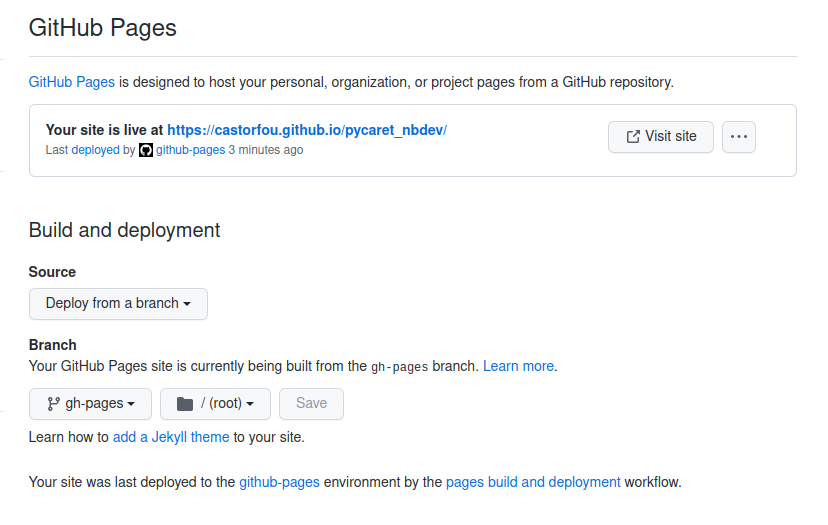

Not a bad thing to run all these stuff

```bash
nbdev_clean
git diff
git status
git add -A
nbdev_export
nbdev_test
nbdev_docs
git commit -am'init version'
git push

```

Note that for a reason nbdev_clean is failing
```bash
/home/guillaume/miniconda/envs/dataset_tools/lib/python3.9/site-packages/nbdev/clean.py:110: UserWarning: Failed to clean notebook
  warn(f'{warn_msg}')
/home/guillaume/miniconda/envs/dataset_tools/lib/python3.9/site-packages/nbdev/clean.py:111: UserWarning: clean_ids
  warn(e)
/home/guillaume/miniconda/envs/dataset_tools/lib/python3.9/site-packages/nbdev/clean.py:111: UserWarning: clean_ids
  warn(e)
```

And Hamel suggests to add `clean_ids = True` in settings.ini



`nbdev_docs`is pushing the content of index.ipynb to README.md

### define dep

Just modify `settings.ini`to add dependancies (here pandas)

```bash
# end of settings.ini
[..]
### Optional ###
requirements = fastcore pandas
# dev_requirements =
# console_scripts =
clean_ids = True
```

Et voila!, doc is available at https://castorfou.github.io/dataset_tools/ and you can push that address to your repo settings

### publish to Pypi, conda, ...

This is done by calling `nbdev_pypi`or `nbdev_conda`.
And it is modifying settings.ini to increment version number. (very much as `nbdev_bump_version` does)

There are other commands such as `nbdev_release_xxx` the seems to do quite the same for git.

# Gitlab integration


because this is the platform we use at Michelin, I will need to make it work with our internal gitlab instance.

There is on-going work to make it happen:

* from Hamel Husain - enhancement request [Support gitlab](https://github.com/fastai/nbdev/issues/945)
* and from fastai community in forum: [Nbdev and Gitlab (source links)](https://forums.fast.ai/t/nbdev-and-gitlab-source-links/98867), [Example: nbdev on Gitlab](https://forums.fast.ai/t/example-nbdev-on-gitlab/98890)

I have published this version to [nbdev forum](https://forums.fast.ai/t/example-nbdev-on-gitlab/98890/2)

## my tests with our internal gitlab

### create project in gitlab

Project name : `nbdev_gitlab`

Project URL : `https://gitlab.michelin.com` `janus` `nbdev_gitlab`

Project description : `This is the smallest project to make nbdev working with gitlab`


> Create project

### clone it 

```bash
conda activate dataset_tools
cd ~/git
git clone git@gitlab.michelin.com:janus/nbdev_gitlab.git
```

### nbdev_new

```bash
export SSL_CERT_FILE='/home/guillaume/miniconda/envs/dataset_tools/lib/python3.9/site-packages/certifi/cacert.pem'
nbdev_new
```

```bash
/home/guillaume/miniconda/envs/dataset_tools/lib/python3.9/site-packages/ghapi/core.py:99: UserWarning: Neither GITHUB_TOKEN nor GITHUB_JWT_TOKEN found: running as unauthenticated
  else: warn('Neither GITHUB_TOKEN nor GITHUB_JWT_TOKEN found: running as unauthenticated')
Could not access repo: janus/nbdev_gitlab to find your default branch - `main` assumed.
Edit `settings.ini` if this is incorrect.
In the future, you can allow nbdev to see private repos by setting the environment variable GITHUB_TOKEN as described here:
https://nbdev.fast.ai/cli.html#Using-nbdev_new-with-private-repos
repo = nbdev_gitlab # Automatically inferred from git
user = janus # Automatically inferred from git
author = guillaume # Automatically inferred from git
author_email = guillaume.ramelet@michelin.com # Automatically inferred from git
# Please enter a value for description
description = This is the smallest project to make nbdev working with gitlab
settings.ini created.
/home/guillaume/miniconda/envs/dataset_tools/lib/python3.9/site-packages/ghapi/core.py:99: UserWarning: Neither GITHUB_TOKEN nor GITHUB_JWT_TOKEN found: running as unauthenticated
  else: warn('Neither GITHUB_TOKEN nor GITHUB_JWT_TOKEN found: running as unauthenticated')
pandoc -o README.md
  to: gfm+footnotes+tex_math_dollars-yaml_metadata_block
  standalone: true
  default-image-extension: png

metadata
  description: This is the smallest project to make nbdev working with gitlab
  title: nbdev_gitlab

Output created: _docs/README.md
```

In [27]:
!ls -l ~/git/nbdev_gitlab

total 36
-rwxrwxrwx 1 guillaume guillaume   978 Sep  5 18:31 00_core.ipynb
-rwxrwxrwx 1 guillaume guillaume 11337 Sep  5 18:31 LICENSE
-rwxrwxrwx 1 guillaume guillaume   111 Sep  5 18:31 MANIFEST.in
-rwxrwxrwx 1 guillaume guillaume   309 Sep 13 14:02 README.md
drwxrwxrwx 1 guillaume guillaume  4096 Sep 13 14:02 _docs
-rwxrwxrwx 1 guillaume guillaume   728 Sep 13 14:02 _quarto.yml
-rwxrwxrwx 1 guillaume guillaume  1561 Sep 13 14:02 index.ipynb
drwxrwxrwx 1 guillaume guillaume  4096 Sep 13 14:02 nbdev_gitlab
-rwxrwxrwx 1 guillaume guillaume   945 Sep 13 14:02 settings.ini
-rwxrwxrwx 1 guillaume guillaume  2541 Sep  5 18:31 setup.py
-rwxrwxrwx 1 guillaume guillaume   600 Sep  5 18:31 styles.css


### change in `settings.ini`

```text
- set company_name = acme

- set doc_path = public
- set branch = main instead of master
- doc_host = https://%(user)s.pages.gitlab.%(company_name)s.com/
- git_url = https://gitlab.%(company_name)s.com/%(user)s/%(repo)s
- doc_baseurl = /%(repo)s
```

### change in `_quarto.yml`

nothing to be done with nbdev > v2.3.3

### create `.gitlab-ci.yml` --> build/publish documentation, push to artifactory

With gitlab you have a nice editor to edit pipelines (CI lint)

One way to debug is to insert `sleep xx` and then click debug. 

You then have access to your docker image.

```bash
default:
  image: 'docker.artifactory.michelin.com/michelin/hub/ubuntu20.04:bib-1.1'
  tags:
    - k8s
  interruptible: true
  retry:
    max: 2
    when:
      - runner_system_failure
      - stuck_or_timeout_failure

# Functions that should be executed before the build script is run
before_script:
  - apt -y install wget
  - wget "https://github.com/quarto-dev/quarto-cli/releases/download/v1.1.189/quarto-1.1.189-linux-amd64.deb"
  - dpkg -i quarto-1.1.189-linux-amd64.deb
  - apt -y install python3-pip
  - wget --no-check-certificate --content-disposition -O - https://raw.githubusercontent.com/castorfou/guillaume_blog/master/files/setup_wsl_08_pip.sh | bash
  - pip3 install nbdev
  - nbdev_install

stages:
  - test
  - build_doc
  - build
  - deploy_artifactory

tests:
  stage: test
  script:
    - nbdev_test

pages:
  stage: build_doc
  script:
    - nbdev_docs
  artifacts:
    paths:
      # The folder that contains the files to be exposed at the Page URL
      - public
  rules:
    # This ensures that only pushes to the default branch will trigger
    # a pages deploy
    - if: $CI_COMMIT_REF_NAME == $CI_DEFAULT_BRANCH

wheel:
  stage: build
  script:
    - mkdir -p public
    - echo "Build wheel with python version `python3 --version`:"
    - pip install -U setuptools wheel pydnx_packaging
    - pip install -e .
    - python3 setup.py bdist_wheel
    - mkdir -p packages && mv dist/* packages/
  artifacts:
    when: always
    paths:
      - packages/

publish:
  stage: deploy_artifactory
  dependencies:
    - wheel
  only:
    - tags
  script:
    # create credential config file
    - >
      if [ -f '.pypirc' ]; then
        echo "Information: .pypirc file is not mandatory anymore." && cp .pypirc ~/
      else
        echo "[distutils]
        index-servers = local
        [local]
        repository: https://artifactory.michelin.com/api/pypi/pypi
        username: fm00884
        password: <don't even think about it>" > ~/.pypirc
      fi
    - pip install -U twine
    - pip index versions nbdev_gitlab || true
    - echo 'If the "twine upload" command below failed with a 403 status code, please check that the version is not already uploaded on artifactory (see versions of nbdev_git above).'
    - twine upload --verbose -r local packages/*
```

### commit to gitlab

```bash
nbdev_prepare
rm -rf index_files
nbdev_docs #optionnal if nbdev_preview was used
nbdev_proc_nbs
git diff
git status
git add -A
git commit -am'<proper comment>'
git push
```

### setup online-documentation badge

![](https://img.shields.io/badge/-online_documentation-grey.svg)

From Settings > General > Badges

create a new entry `doc`

Link: `https://janus.si-pages.michelin.com/nbdev_gitlab/`

Badge image URL: `https://img.shields.io/badge/-online_documentation-grey.svg`

### [manual way] create a new version, tag, publication to artifactory

To summarize, here is the publishing process

```bash
nbdev_bump_version
git add -A
git commit -am'<my tag changelog>'
git tag -a 0.0.3 -m "<my tag changelog>"
git push origin 0.0.3 
```

And it will be published at: [artifactory janus-tools package](https://artifactory.michelin.com/ui/packages/pypi:%2F%2Fjanus-tools?name=janus-tools&type=packages)

to automatically reuse tag name from settings.ini, just use [(script way) create a new version, tag, publication to artifactory](#script-way-create-a-new-version-tag-publication-to-artifactory)

`nbdev_bump_version` increases version number (in settings.ini and __ini__.py)

```bash
$ nbdev_bump_version
Old version: 0.0.2
New version: 0.0.3
```

which is modifying 2 files:
```bash
$ git diff
diff --git a/nbdev_gitlab/__init__.py b/nbdev_gitlab/__init__.py
-__version__ = "0.0.2"
+__version__ = "0.0.3"
diff --git a/settings.ini b/settings.ini
-version = 0.0.2
+version = 0.0.3
```

### [script way] create a new version, tag, publication to artifactory

just call `push_tag.sh`, it will increase version (calling nbdev_bump_version), and create/push tag with this version and last git commit

In [2]:
!cat ../files/push_tag.sh

#!/bin/bash
nbdev_bump_version
LAST_GIT_COMMENT=`git log -1 --pretty=%B`
VERSION_TO_TAG=`grep "version " settings.ini | cut -d '=' -f 2`

echo "Tag: $VERSION_TO_TAG - Comment: $LAST_GIT_COMMENT"

git add -A
git commit -am"$LAST_GIT_COMMENT"
git tag -a $VERSION_TO_TAG -m "$LAST_GIT_COMMENT"
git push origin $VERSION_TO_TAG


# `#| ` directives from quarto and nbdev

This is detailed at https://nbdev.fast.ai/explanations/directives.html

## `#| hide`

not exported, not displayed in doc, executed in jupyter

Some examples:

### imports

imports that I need for development that I don't need in my lib

here it will be used later in internal tests (and will be executed with nbdev_test)

```python
#| hide
#not exported, not displayed in doc, executed in jupyter
# I need this to develop but not to be found in my lib (actuelly my lib should not depend on nbdev)
from nbdev.showdoc import *
import tempfile
from sklearn.datasets import load_diabetes
```

### tests

some internal tests that I don't wand in doc

```python
#| hide
with tempfile.TemporaryDirectory(dir=root_data) as tmpdirname:
    temp_mixpath = MixPath(tmpdirname.split(os.sep)[-1])
    print(temp_mixpath, temp_mixpath.OBF_DIRECTORY)
```

or

```python
#| hide
test_eq(ml25625,MixPath('25625'))
```

### toc

some markdown that will appear in jupyter's TOC

but not in doc because I have some export after that
```text
#| hide

### DatasetObf.get_dataset_initial_filtré
```

### export module

at the end of notebook

here to have an entry in TOC
```text
#| hide
# Export module
```
and here to export notebook code when `restart kernel and run all`
```python
#| hide
import nbdev; nbdev.nbdev_export()
```

## `#| exporti` - used in combination of `@patch` and `show_doc`

exporti will export code but not doc - I use show_doc below

without exporti I would have 2 entries in doc

I prefer it like that to have a toc entry in jupyter 

And only with methods from a class. (otherwise it won't be exposed)

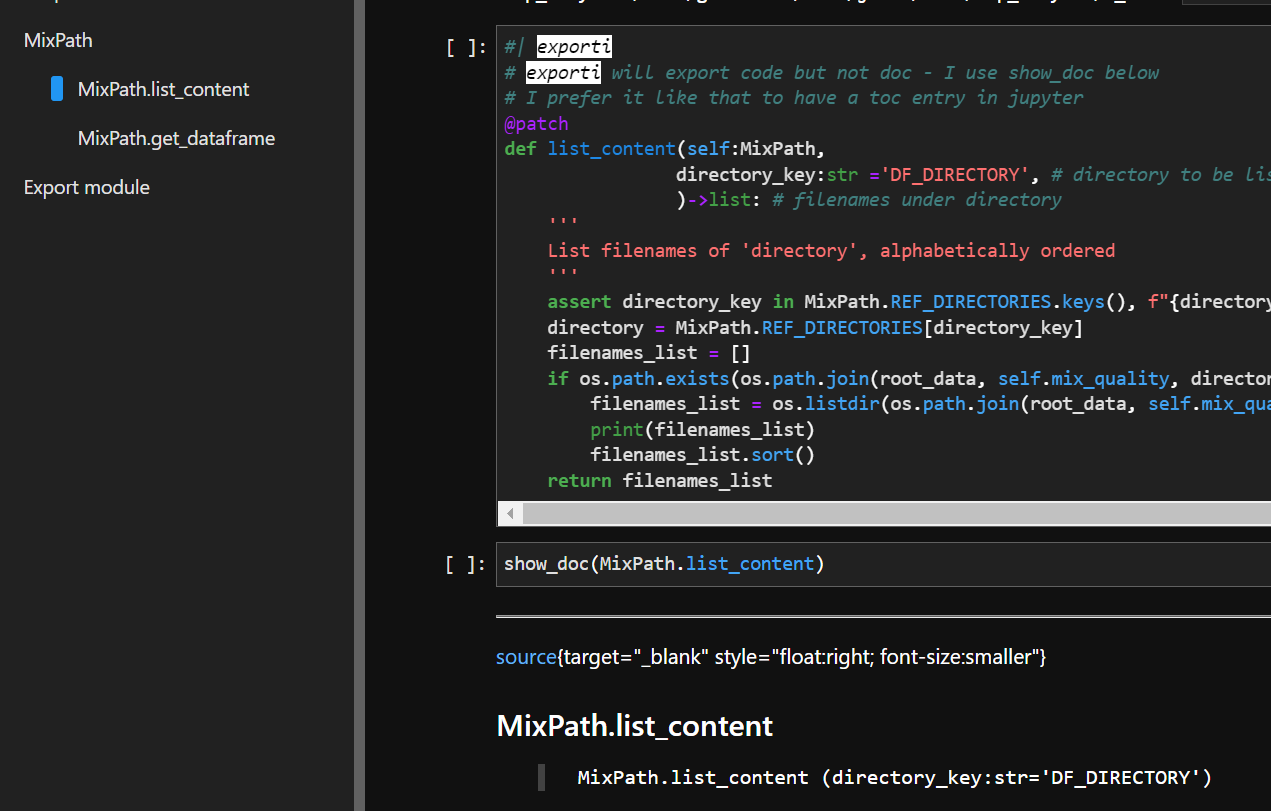

# nbdev v2.3

New release 2.3 made Sept-14

https://forums.fast.ai/t/upcoming-changes-in-v2-3-edit-now-released/98905

To migrate:

```bash
pip install -U nbdev
rm _quarto.yml
nbdev_new
# reintegrate entries in settings.ini that could have been changed such as requirements, dev_requirements, clean_ids
```

# nbdev v2.3.7

changelog: https://github.com/fastai/nbdev/releases/tag/2.3.7

applying these changes:
- recursive = True
- notebooks in nbs folder
- not understood what nbdev_proc_nbs is compared to nbdev_docs

To move notebooks to nbs:
```bash
mv *.ipynb nbs/
mv _quarto.yml nbs/
mv styles.css nbs/
```

# Open questions

## [fixed] nbdev_clean fails

https://forums.fast.ai/t/nbdev-clean-fails-cryptically/98784/13

Solution: update `fastcore` to version > 1.2.5